In [1]:
import numpy as np
from numpy import random as r
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
X_train = pd.read_csv(r'xtrain.csv')
X_test = pd.read_csv(r'xtest.csv')
Y_train = pd.read_csv(r'ytrain.csv')
Y_test = pd.read_csv(r'ytest.csv')
X_train

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,Population,Tenure Years,Age group,Churn score group,citywise_customer_%,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Multiple Lines_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Online Backup_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Phone Service_Yes,Gender_Male,Internet Service_Yes,Device Protection Plan_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes
0,1.321705,0,0.094771,0.155798,0.050686,0,-1.128260,0.523523,-0.826099,0.0,0.056878,-0.914536,-0.245863,-0.263604,31.13,-0.944217,3,0.760460,0.351068,0.155164,1,5,9,-0.045704,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1,-0.191899,0,1.197843,1.029225,-0.969510,0,-0.919693,-0.383509,0.043879,0.0,-0.412108,-0.767824,-0.245863,-0.263604,103.08,-0.803142,1,1.373450,-0.179846,0.732669,1,3,10,-0.045580,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1
2,-0.774055,1,1.169086,0.875193,-0.467068,0,-1.128260,1.074245,-0.211997,0.0,-0.634351,-0.923606,-0.245863,-0.263604,39.60,-0.948283,2,0.288929,-1.018707,-0.781795,1,2,8,-0.044593,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,1
3,-0.657624,0,0.337848,0.639721,-1.223525,0,-0.419132,-0.687804,-0.826099,2.0,0.489114,-0.291865,-0.245863,-0.263604,225.00,-0.385660,1,0.619001,-0.856319,2.422669,2,2,8,-0.042903,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1
4,-0.599409,0,-1.878605,-0.848100,0.600247,0,0.039715,1.381791,-0.723749,0.0,0.380618,0.148431,-0.245863,-0.263604,1285.57,0.342158,2,1.137685,-0.904278,0.855717,3,2,0,-0.029985,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,-1.472642,3,-0.200937,-0.669823,-0.155622,0,-0.877979,1.739402,-1.081975,0.0,-1.672069,-0.866290,-0.245863,-0.263604,348.81,-0.791850,5,-1.125664,-0.988417,1.267753,1,1,5,-0.045868,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0
6947,0.157394,0,1.377981,2.107989,-1.496188,8,1.791677,0.265393,-0.928449,2.0,1.579330,2.706120,-0.245863,-0.263604,1928.36,2.581147,3,0.430388,-0.215184,-0.971238,6,4,8,-0.041861,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
6948,1.438137,0,0.088803,0.341348,0.113465,2,0.248282,-0.656594,-0.672573,1.0,0.123376,0.168272,-0.245863,-0.263604,441.32,0.053430,3,0.288929,-0.623256,-1.010662,3,5,8,-0.039177,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1
6949,-1.356211,0,-0.028938,-0.490660,-0.386949,0,1.374543,1.539790,-1.081975,1.0,-1.661569,-0.346747,-0.245863,-0.263604,2852.36,0.518263,4,-1.408582,0.102859,-0.804083,6,1,4,-0.044472,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [3]:
type(X_train)

pandas.core.frame.DataFrame

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

col1 = SelectKBest(score_func = f_classif, k=20)
col2 = col1.fit(X_train,Y_train)
scores = pd.DataFrame(col2.scores_ , columns=['Score']) 
column_names = pd.DataFrame(X_train.columns)
selected_feat1 = pd.concat([column_names , scores],axis=1)
selected_feat1.columns = ['Feature','Score']
df_2 = selected_feat1.nlargest(20,'Score')
df_2

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,Score
16,Satisfaction Score,12210.246084
17,Churn Score,8752.893009
9,Contract,1683.794013
22,Churn score group,1520.013484
6,Tenure in Months,1333.104267
20,Tenure Years,1199.585311
5,Number of Referrals,1114.334686
32,Internet Type_Fiber Optic,698.726887
33,Internet Type_None,634.080674
43,Internet Service_Yes,634.080674


In [5]:
features_final_1 = df_2['Feature'].to_list()
features_final_1.remove('Satisfaction Score')
features_final_1.remove('Churn Score')
features_final_1

['Contract',
 'Churn score group',
 'Tenure in Months',
 'Tenure Years',
 'Number of Referrals',
 'Internet Type_Fiber Optic',
 'Internet Type_None',
 'Internet Service_Yes',
 'Number of Dependents',
 'Total Long Distance Charges',
 'Payment Method_Credit Card',
 'Total Revenue',
 'Paperless Billing_Yes',
 'Total Charges',
 'Monthly Charge',
 'Online Security_Yes',
 'Unlimited Data_Yes',
 'Offer_Offer E']

In [6]:
X_train1 = X_train[features_final_1]
X_test1 = X_test[features_final_1]
X_train1

,Contract,Churn score group,Tenure in Months,Tenure Years,Number of Referrals,Internet Type_Fiber Optic,Internet Type_None,Internet Service_Yes,Number of Dependents,Total Long Distance Charges,Payment Method_Credit Card,Total Revenue,Paperless Billing_Yes,Total Charges,Monthly Charge,Online Security_Yes,Unlimited Data_Yes,Offer_Offer E
0,0.0,9,-1.128260,1,0,1,0,1,0,31.13,0,-0.944217,1,-0.914536,0.056878,0,1,0
1,0.0,10,-0.919693,1,0,0,0,1,0,103.08,0,-0.803142,0,-0.767824,-0.412108,1,1,1
2,0.0,8,-1.128260,1,0,0,0,1,1,39.60,0,-0.948283,1,-0.923606,-0.634351,0,1,0
3,2.0,8,-0.419132,2,0,0,0,1,0,225.00,1,-0.385660,1,-0.291865,0.489114,0,1,0
4,0.0,0,0.039715,3,0,1,0,1,0,1285.57,0,0.342158,1,0.148431,0.380618,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.0,5,-0.877979,1,0,0,1,0,3,348.81,0,-0.791850,1,-0.866290,-1.672069,0,0,1
6947,2.0,8,1.791677,6,8,1,0,1,0,1928.36,0,2.581147,1,2.706120,1.579330,0,1,0
6948,1.0,8,0.248282,3,2,1,0,1,0,441.32,1,0.053430,0,0.168272,0.123376,0,1,0
6949,1.0,4,1.374543,6,0,0,1,0,0,2852.36,1,0.518263,0,-0.346747,-1.661569,0,0,0


In [7]:
X_train1.drop('Churn score group',axis=1,inplace=True)
X_train1

C:\Users\daisy\AppData\Local\Temp\ipykernel_221392\3974120540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1.drop('Churn score group',axis=1,inplace=True)


,Contract,Tenure in Months,Tenure Years,Number of Referrals,Internet Type_Fiber Optic,Internet Type_None,Internet Service_Yes,Number of Dependents,Total Long Distance Charges,Payment Method_Credit Card,Total Revenue,Paperless Billing_Yes,Total Charges,Monthly Charge,Online Security_Yes,Unlimited Data_Yes,Offer_Offer E
0,0.0,-1.128260,1,0,1,0,1,0,31.13,0,-0.944217,1,-0.914536,0.056878,0,1,0
1,0.0,-0.919693,1,0,0,0,1,0,103.08,0,-0.803142,0,-0.767824,-0.412108,1,1,1
2,0.0,-1.128260,1,0,0,0,1,1,39.60,0,-0.948283,1,-0.923606,-0.634351,0,1,0
3,2.0,-0.419132,2,0,0,0,1,0,225.00,1,-0.385660,1,-0.291865,0.489114,0,1,0
4,0.0,0.039715,3,0,1,0,1,0,1285.57,0,0.342158,1,0.148431,0.380618,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.0,-0.877979,1,0,0,1,0,3,348.81,0,-0.791850,1,-0.866290,-1.672069,0,0,1
6947,2.0,1.791677,6,8,1,0,1,0,1928.36,0,2.581147,1,2.706120,1.579330,0,1,0
6948,1.0,0.248282,3,2,1,0,1,0,441.32,1,0.053430,0,0.168272,0.123376,0,1,0
6949,1.0,1.374543,6,0,0,1,0,0,2852.36,1,0.518263,0,-0.346747,-1.661569,0,0,0


In [8]:
X_test1=X_test1.drop('Churn score group',axis=1)
X_test1

,Contract,Tenure in Months,Tenure Years,Number of Referrals,Internet Type_Fiber Optic,Internet Type_None,Internet Service_Yes,Number of Dependents,Total Long Distance Charges,Payment Method_Credit Card,Total Revenue,Paperless Billing_Yes,Total Charges,Monthly Charge,Online Security_Yes,Unlimited Data_Yes,Offer_Offer E
0,0.0,-1.086546,1,0,1,0,1,0,82.36,0,-0.884302,1,-0.861720,0.489114,0,1,0
1,0.0,0.707129,4,0,1,0,1,0,635.40,1,0.956946,1,1.230389,1.148844,0,1,0
2,2.0,-1.128260,1,9,0,1,0,0,43.57,0,-0.958061,0,-0.937889,-1.722817,0,0,0
3,2.0,1.457970,6,0,0,0,1,0,1724.94,1,0.903977,0,0.662509,-0.331610,0,1,0
4,2.0,0.915696,5,0,0,1,0,0,1086.00,1,-0.232619,0,-0.492288,-1.675568,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,1.0,1.833391,6,8,0,0,1,0,2696.40,0,2.491359,1,2.170089,0.853103,1,0,0
2321,2.0,-0.460846,2,8,0,1,0,0,249.73,0,-0.771676,0,-0.795081,-1.684318,0,0,0
2322,1.0,-0.377419,2,0,0,1,0,0,658.92,1,-0.613953,0,-0.782038,-1.693068,0,0,0
2323,2.0,-0.210565,2,2,0,1,0,0,572.24,0,-0.616811,0,-0.745871,-1.693068,0,0,0


In [28]:
X_train1.to_csv('xtrain_final.csv', index=False)
X_test1.to_csv('xtest_final.csv', index=False)
Y_train.to_csv('ytrain_final.csv',index=False)
Y_test.to_csv('ytest_final.csv',index=False)

In [11]:
## logistic

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, fbeta_score,recall_score , roc_auc_score,confusion_matrix,make_scorer

param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}

scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
## hyperparameter tuning

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train1, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)

## prediction and model evaluation

Y_pred = best_log_reg.predict(X_test1)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
recall_log = recall_score(Y_test, Y_pred, average='macro')

Logistic_reg = [accuracy_log , precision_log , fbeta_log ,recall_log]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)
print("Recall Score on Test Set:", recall_log)
cm_lr = confusion_matrix(Y_test, Y_pred)
print("Confusion metrics of Random Forest:", cm_lr)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set t

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.7729032258064517
Precision on Test Set: 0.7347316626598592
F-beta Score on Test Set: 0.763790724586078
Recall Score on Test Set: 0.7846678614299964
Confusion metrics of Random Forest: [[1289  409]
 [ 119  508]]


C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## hyperparameter tuning

dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid, cv=5)
dt1_grid_search.fit(X_train1, Y_train)
dt1_best_classifier = dt1_grid_search.best_estimator_

## best decision tree classifier prediction

dt1_best_pred = dt1_best_classifier.predict(X_test1)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')
recall_dt = recall_score(Y_test, Y_pred, average='macro')
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt , recall_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)
print("Recall Score on Test Set:", recall_dt)
cm_dt = confusion_matrix(Y_test, dt1_best_pred)
print("Confusion metrics of Random Forest:", cm_dt)

Best Decision Tree Accuracy: 0.7802150537634409
Precision of Decision Tree :  0.7201321029111314
Fbeta score is :  0.7123439576275945
Recall Score on Test Set: 0.7846678614299964
Confusion metrics of Random Forest: [[1463  235]
 [ 276  351]]


In [13]:
## naive

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p


# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train1, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)

nb_best_pred = nb_best_classifier.predict(X_test1)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
recall_nb = recall_score(Y_test, Y_pred, average='macro')
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb,recall_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)
print("Recall Score on Test Set:", recall_nb)
cm_nb = confusion_matrix(Y_test, nb_best_pred)
print("Confusion metrics of Random Forest:", cm_nb)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-07}
Best Naive Bayes Accuracy: 0.7501075268817204
Precision is : 0.7160102967379909
Fbeta score is :  0.7423506273712664
Recall Score on Test Set: 0.7846678614299964
Confusion metrics of Random Forest: [[1243  455]
 [ 126  501]]


In [14]:
## adaboost

from sklearn.ensemble import AdaBoostClassifier
base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')

for name, model in base_classifiers:
    adaboost.fit(X_train1, Y_train)
    Y_pred = adaboost.predict(X_test1)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
    recall_ada =recall_score(Y_test, Y_pred, average='macro')
print("Accuracy of AdaBoost:", accuracy_ada)
print("Precision of AdaBoost:", precision_ada)
print("fbeta of AdaBoost:", fbeta_ada)
print("Recall of AdaBoost:", recall_ada)
cm_ada = confusion_matrix(Y_test, Y_pred)
print("Confusion metrics of Ada:", cm_ada)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of AdaBoost: 0.8008602150537635
Precision of AdaBoost: 0.7634628636346705
fbeta of AdaBoost: 0.7966874071223152
Recall of AdaBoost: 0.8188975490444711
Confusion metrics of Random Forest: [[1324  374]
 [  89  538]]


In [51]:
## random f

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
param_grid = {
    'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   }
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train1, Y_train)

best_params = grid_search.best_params_
model = grid_search.best_estimator_
 
model.fit(X_train1, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test1) 
accuracy_rf = accuracy_score ( Y_test, Y_pred)
precision_rf = precision_score( Y_test, Y_pred , average='macro')
fbeta_rf = fbeta_score ( Y_test,Y_pred , beta=2, average='macro')
recall_rf = recall_score(Y_test, Y_pred, average='macro')
Random_forest = [accuracy_rf, precision_rf, fbeta_rf,recall_rf ]

#print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion metrics of Random Forest:", cm)
print("Accuracy of Random Forest:", accuracy_rf)
print("Precision of Random Forest:", precision_rf)
print("fbeta of Random Forest:", fbeta_rf)
print("Recall of Random Forest:", recall_rf)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Confusion metrics of Random Forest: [[1608   90]
 [  96  531]]
Accuracy of Random Forest: 0.92
Precision of Random Forest: 0.8993672177995509
fbeta of Random Forest: 0.8974207929104983
Recall of Random Forest: 0.8969432092921027


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
model_g = GradientBoostingClassifier()
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train1, Y_train)

# Make predictions
Y_pred = best_model.predict(X_test1)

# Evaluate the model
accuracy_gb = accuracy_score ( Y_test, Y_pred)
precision_gb = precision_score( Y_test,Y_pred , average='macro')
fbeta_gb = fbeta_score ( Y_test,Y_pred , beta=2, average='macro')
recall_gb = recall_score(Y_test, Y_pred, average='macro')
gradient_b = [accuracy_gb, precision_gb, fbeta_gb,recall_gb ]
print("Accuracy:", accuracy_gb)
#print("Classification Report:")
#print(classification_report(Y_test, Y_pred))
print("Accuracy of Gradient Boost:", accuracy_gb)
print("Precision of Gradient Boost:", precision_gb)
print("fbeta of Gradient Boost:", fbeta_gb)
print("Recall of Gradient Boost:", recall_gb)
cm_gb = confusion_matrix(Y_test, Y_pred)
print("Confusion metrics of Random Forest:", cm_gb)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8911827956989248
Accuracy of Gradient Boost: 0.8911827956989248
Precision of Gradient Boost: 0.862683284457478
fbeta of Gradient Boost: 0.8606175167284857
Recall of Gradient Boost: 0.8601126571649168
Confusion metrics of Random Forest: [[1575  123]
 [ 130  497]]


In [ ]:
######

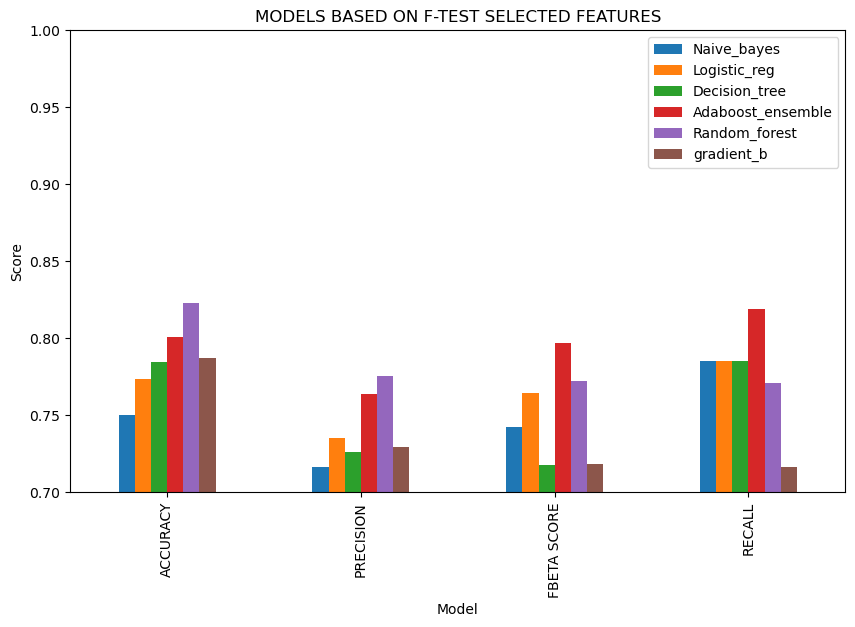

In [43]:
Adaboost_ensemble =[accuracy_ada , precision_ada , fbeta_ada, recall_ada]
df_eda = {
    'Naive_bayes': Naive_bayes,
 'Logistic_reg': Logistic_reg ,
 'Decision_tree': Decision_tree,
 'Adaboost_ensemble': Adaboost_ensemble,
     'Random_forest': Random_forest,
     'gradient_b': gradient_b
}

df_eda = pd.DataFrame(df_eda)
df_eda.index = ['ACCURACY','PRECISION','FBETA SCORE','RECALL']
df_eda.plot(kind='bar', figsize=(10, 6))
plt.title('MODELS BASED ON F-TEST SELECTED FEATURES')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.70, 1.0)
plt.legend(loc='upper right')
plt.show()

In [44]:
df_eda

,Naive_bayes,Logistic_reg,Decision_tree,Adaboost_ensemble,Random_forest,gradient_b
ACCURACY,0.750108,0.773333,0.784516,0.800860,0.822796,0.787097
PRECISION,0.716010,0.735064,0.725836,0.763463,0.775543,0.729250
FBETA SCORE,0.742351,0.764156,0.717849,0.796687,0.771901,0.718565
RECALL,0.784962,0.784962,0.784962,0.818898,0.771042,0.716423


## MODEL 1

In [60]:
cm_lr

array([[1367,  331],
       [  95,  532]], dtype=int64)

In [67]:
cm_dt

array([[1580,  118],
       [ 127,  500]], dtype=int64)

In [69]:
cm_nb

array([[1260,  438],
       [ 113,  514]], dtype=int64)

In [15]:
print(cm_ada)

[[1324  374]
 [  89  538]]


In [71]:
cm # random forest

array([[1608,   90],
       [  96,  531]], dtype=int64)

In [72]:
cm_gb

array([[1575,  123],
       [ 130,  497]], dtype=int64)